In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pyodbc 

# ALEXANDER VILLATORO 1182118

In [4]:
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=localhost;DATABASE=Admisiones_DWH;Trusted_Connection=yes;')

In [5]:
query = "select * from Fact.Examen E inner join Dimension.Carrera C on (E.SK_Carrera = C.SK_Carrera) ;"
df = pd.read_sql(query, conn)
print(df.head(26))

    SK_Examen  SK_Candidato  SK_Carrera   DateKey  ID_Examen  ID_Descuento  \
0           1          1277          12  20200101        818             1   
1           2           246           8  20200106       1002             2   
2           3           315           5  20190502         31             3   
3           4           813          15  20200103        996             3   
4           5           849          14  20180802         33             3   
5           6           833          11  20200801        527             3   
6           7           680           6  20170101         82             3   
7           8          1256          15  20190802        763             1   
8           9           293           1  20180402        716             3   
9          10           402          14  20160102        795             3   
10         11           789          14  20160501        488             1   
11         12           434          12  20160603        879    

In [8]:
dfExamenFacultad =  df.groupby('NombreFacultad').count()
dfExamenFacultad

,SK_Examen,SK_Candidato,SK_Carrera,DateKey,ID_Examen,ID_Descuento,DescripcionDescuento,PorcentajeDescuento,Precio,NotaTotal,NotaArea,NombreMateria,SK_Carrera,ID_Carrera,ID_Facultad,NombreCarrera
NombreFacultad,,,,,,,,,,,,,,,,
Arquitectura,3117,3117,3117,3117,3117,3117,3117,3117,3117,3117,3117,3117,3117,3117,3117,3117
Ciencias Agricolas,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097
Ciencias Economicas,3102,3102,3102,3102,3102,3102,3102,3102,3102,3102,3102,3102,3102,3102,3102,3102
Ciencias Politicas,3178,3178,3178,3178,3178,3178,3178,3178,3178,3178,3178,3178,3178,3178,3178,3178
Ingeniería,3273,3273,3273,3273,3273,3273,3273,3273,3273,3273,3273,3273,3273,3273,3273,3273
Medicina,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095


In [19]:
import pyodbc 
import pandas as pd

conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=localhost;DATABASE=Admisiones_DWH;Trusted_Connection=yes;')

query = "select C.ID_Candidato, C.Genero  from Dimension.Candidato C;"
df = pd.io.sql.read_sql(query, conn)
dfCandidatoGenero = df.groupby(['Genero']).count()
dfCandidatoGenero

,ID_Candidato
Genero,
F,4947
M,5053


## Un total de la cantidad de ingresos por evaluaciones (columna precio) que se ha recibido agrupado por carrera

In [20]:
import pyodbc 
import pandas as pd

conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=localhost;DATABASE=Admisiones_DWH;Trusted_Connection=yes;')

query = " SELECT  C.NombreCarrera, E.Precio FROM Fact.Examen E INNER JOIN Dimension.Carrera C ON (E.SK_Carrera = C.SK_Carrera) ;"
df = pd.io.sql.read_sql(query, conn)
dfTotalCarrera = df.groupby(['NombreCarrera']).sum()
dfTotalCarrera

,Precio
NombreCarrera,
Admin de Empresas,499281.16
Agronomia,520031.00
Arquitecrtura,474667.98
Ciencias sociales,488447.78
Contador Publico y Auditor,490333.51
Derecho internacional,538236.90
Diseño Industrial,487625.48
Diseño grafico,516848.60
Enfermeria,477730.20


## Un data frame filtrado que contenga únicamente las tres facultades con el promedio de la nota mas alto


In [22]:
import pyodbc 
import pandas as pd

conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=localhost;DATABASE=Admisiones_DWH;Trusted_Connection=yes;')

query = " select C.NombreFacultad, E.NotaTotal from Fact.Examen E inner join Dimension.Carrera C on (E.SK_Carrera = C.SK_Carrera);"
df = pd.io.sql.read_sql(query, conn)

dfAgrupadoFacultad = df.groupby('NombreFacultad').mean('NotaTotal')
dfAgrupadoFacultad.nlargest(3,'NotaTotal')


,NotaTotal
NombreFacultad,
Ciencias Economicas,75.547066
Medicina,75.530388
Ciencias Politicas,75.404991


## Un grafico de pie con la cantidad de exámenes agrupados por facultad


<AxesSubplot:ylabel='SK_Examen'>

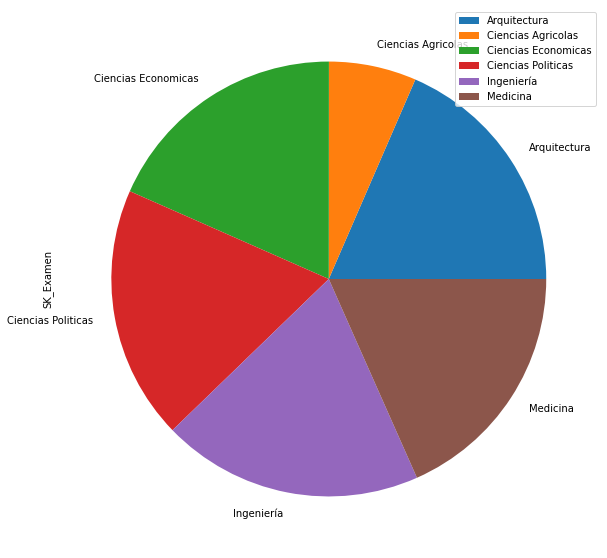

In [26]:
import matplotlib as mpl

dfExamenFacultad.plot.pie(y='SK_Examen',figsize=(10,10))

<AxesSubplot:xlabel='NombreFacultad'>

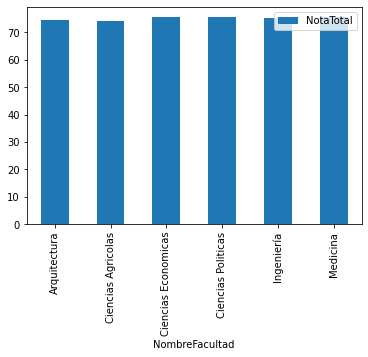

In [27]:
import pyodbc 
import pandas as pd

conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=localhost;DATABASE=Admisiones_DWH;Trusted_Connection=yes;')

query = " select C.NombreFacultad, E.NotaTotal from Fact.Examen E inner join Dimension.Carrera C on (E.SK_Carrera = C.SK_Carrera);"
df = pd.io.sql.read_sql(query, conn)

dfAgrupadoFacultad = df.groupby('NombreFacultad').mean('NotaTotal')

dfAgrupadoFacultad.plot(kind = 'bar')

<AxesSubplot:xlabel='Year'>

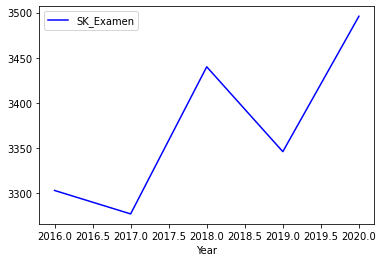

In [10]:
import pyodbc 
import pandas as pd

conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=localhost;DATABASE=Admisiones_DWH;Trusted_Connection=yes;')

query = " select SK_Examen, F.Year from Fact.Examen E inner join Dimension.Fecha F on (E.DateKey = F.DateKey) ;"
df = pd.io.sql.read_sql(query, conn)

dfExamenAnio = df.groupby('Year').count()

dfExamenAnio.plot.line(color={"SK_Examen": "blue"})